### 1、先尝试调用sklearn的线性回归模型训练数据，尝试以下代码，画图查看分类的结果

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df_X = pd.read_csv('logistic_x.txt', sep='\ +',header=None, engine='python') #读取X值
ys = pd.read_csv('logistic_y.txt', sep='\ +',header=None, engine='python') #读取y值
ys = ys.astype(int)
df_X['label'] = ys[0].values #将X按照y值的结果一一打标签

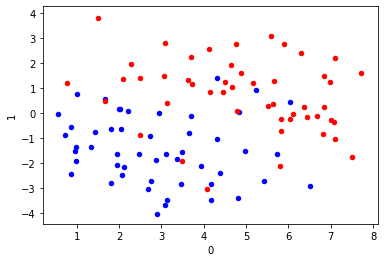

In [4]:
ax = plt.axes()
#在二维图中描绘X点所处位置，直观查看数据点的分布情况
df_X.query('label == 0').plot.scatter(x=0, y=1, ax=ax, color='blue')
df_X.query('label == 1').plot.scatter(x=0, y=1, ax=ax, color='red')

In [5]:
#提取用于学习的数据
Xs = df_X[[0, 1]].values
Xs = np.hstack([np.ones((Xs.shape[0], 1)), Xs]) 
ys = df_X['label'].values

In [6]:
from __future__ import print_function
import numpy as np
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(fit_intercept=False) #因为前面已经将截距项的值合并到变量中，此处参数设置不需要截距项
lr.fit(Xs, ys) #拟合
score = lr.score(Xs, ys) #结果评价
print("Coefficient: %s" % lr.coef_)
print("Score: %s" % score)

Coefficient: [[-1.70090714  0.55446484  1.07222372]]
Score: 0.898989898989899


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


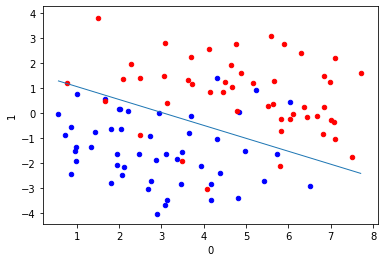

In [7]:
ax = plt.axes()

df_X.query('label == 0').plot.scatter(x=0, y=1, ax=ax, color='blue')
df_X.query('label == 1').plot.scatter(x=0, y=1, ax=ax, color='red')

_xs = np.array([np.min(Xs[:,1]), np.max(Xs[:,1])])

#将数据以二维图形式描点，并用学习得出的参数结果作为阈值，划分数据区域
_ys = (lr.coef_[0][0] + lr.coef_[0][1] * _xs) / (- lr.coef_[0][2])
plt.plot(_xs, _ys, lw=1)

### 2 用梯度下降法将相同的数据分类，画图和sklearn的结果相比较

In [8]:
Xs.shape, ys.shape

((99, 3), (99,))

In [9]:
type(Xs),type(ys)

(numpy.ndarray, numpy.ndarray)

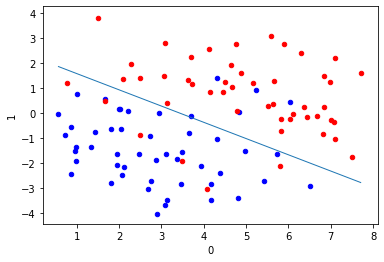

In [10]:
class LGR_GD():
    def __init__(self):
        self.w = None 
        self.n_iters = None

    #sigmoid函数
    def sigmoid(self, X):
        z = X.dot(self.w.T)
        return 1/(1 + np.exp(-z))
    def fit(self,X,y,alpha=0.03,loss = 1e-10): # 设定步长为0.002，判断是否收敛的条件为1e-10
        y = y.reshape(-1,1) #重塑y值的维度以便矩阵运算
        [m,d] = np.shape(X) #自变量的维度
        self.w = np.zeros((1,d)) #将参数的初始值定为0
        tol = 1e5
        self.n_iters = 0
        #============================= show me your code =======================
        while tol > loss: #设置收敛条件
            tmp = self.sigmoid(X)- y
            tol = np.abs(np.sum(tmp))
            self.w = self.w - 1/m * alpha * np.dot(tmp.T, X)
            self.n_iters += 1 #更新迭代次数
         #============================= show me your code =======================
    def predict(self, X):
        # 用已经拟合的参数值预测新自变量
        y_pred = X.dot(self.w)
        return y_pred

if __name__ == "__main__":
    lr_gd = LGR_GD()
    
    lr_gd.fit(Xs,ys)
    ax = plt.axes()

    df_X.query('label == 0').plot.scatter(x=0, y=1, ax=ax, color='blue')
    df_X.query('label == 1').plot.scatter(x=0, y=1, ax=ax, color='red')
    _xs = np.array([np.min(Xs[:,1]), np.max(Xs[:,1])])
    _ys = (lr_gd.w[0][0] + lr_gd.w[0][1] * _xs) / (- lr_gd.w[0][2])
    plt.plot(_xs, _ys, lw=1)

### 3 用牛顿法实现结果，画图和sklearn的结果相比较，并比较牛顿法和梯度下降法迭代收敛的次数¶

In [11]:
class LGR_NT():
    def __init__(self):
        self.w = None
        self.n_iters = None
    #sigmoid函数
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def fit(self,X,y,loss = 1e-10): # 判断是否收敛的条件为1e-10
        y = y.reshape(-1,1) #重塑y值的维度以便矩阵运算
        [m,d] = np.shape(X) #自变量的维度
        self.w = np.zeros((1,d)) #将参数的初始值定为0
        tol = 1e5
        n_iters =0
        Hessian = np.zeros((d,d))
        loss_f = 0
        #============================= show me your code =======================
        while tol > loss:
            A = 1/(1 + np.exp(-X.dot(self.w.T)))
            grad = np.dot((A-y).T, X)/m
            
            for i in range(d):
                for j in range(d):
                    Hessian[i][j] = np.mean(A*(1 - A)*X[:,i]*X[:,j])
            self.w = self.w - (np.linalg.inv(Hessian).dot(grad.T)).T
            loss_next = -(np.dot(np.log(A).T, y)+np.dot(np.log(1 - A).T, (1-y)))/m
            tol = np.abs(loss_next - loss_f)  #abs函数用于返回数值的绝对值 
            loss_f = loss_next
            
            n_iters += 1
        #============================= show me your code =======================
        self.n_iters = n_iters
        
    def predict(self, X):
        # 用已经拟合的参数值预测新自变量
        y_pred = X.dot(self.w)
        return y_pred  

if __name__ == "__main__":
    lgr_nt = LGR_NT()
    lgr_nt.fit(Xs,ys)

### 比较梯度下降法和牛顿法收敛速度

In [12]:
print("梯度下降法结果参数：%s;梯度下降法迭代次数：%s" %(lr_gd.w,lr_gd.n_iters))
print("牛顿法结果参数：%s;牛顿法迭代次数：%s" %(lgr_nt.w,lgr_nt.n_iters))

梯度下降法结果参数：[[-2.6205116   0.76037154  1.17194674]];梯度下降法迭代次数：48306
牛顿法结果参数：[[-2.62049103  0.76036562  1.17193563]];牛顿法迭代次数：22
